# Data Classification

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import time



# Import Dataset

In [2]:
col_list = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names = col_list)

In [3]:
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
X = data[feature_names]
display(data)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# Visualization


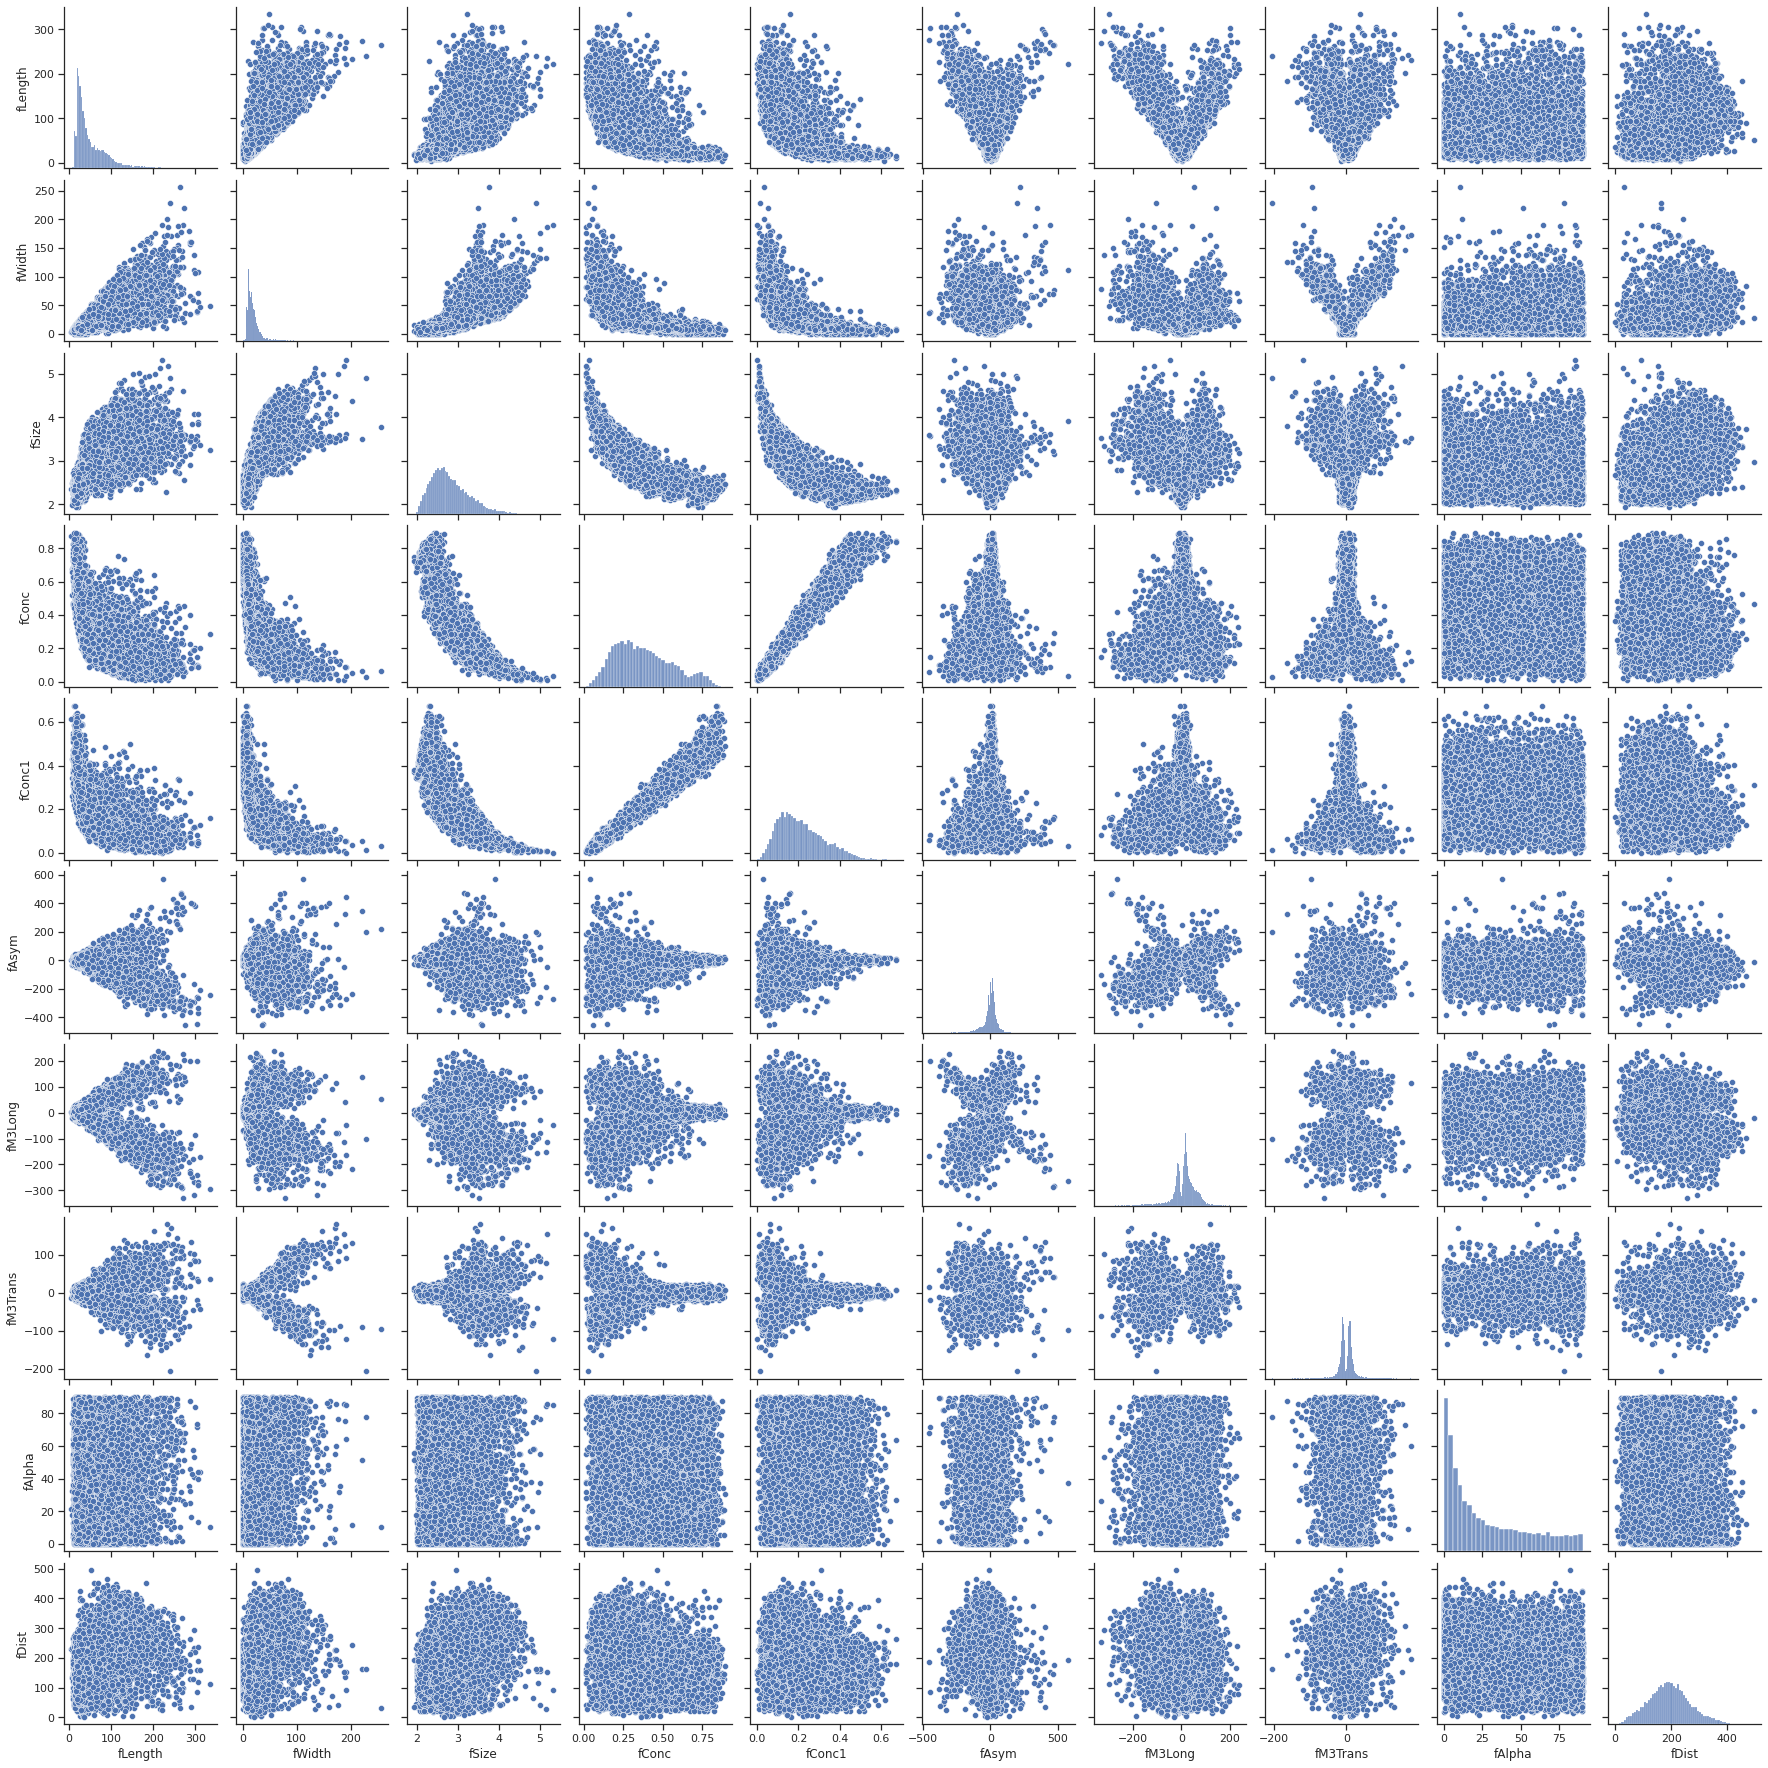

In [ ]:
sns.pairplot(data)

# Tuning

In [4]:
g_subset = data[data.Class == 'g']
h_subset = data[data.Class == 'h']
g_length = len(g_subset)
h_length = len(h_subset)
balance_diff = abs(g_length-h_length)
if g_length > h_length:
  drop_indices = np.random.choice(g_subset.index, balance_diff, replace=False)
  g_subset = g_subset.drop(drop_indices)
elif h_length > g_length:
  drop_indices = np.random.choice(h_subset.index, balance_diff, replace=False)
  h_subset = h_subset.drop(drop_indices)
balanced_data = g_subset.append(h_subset)
display(balanced_data)
print(balanced_data.shape)
print(balanced_data.info())
print(balanced_data['Class'].value_counts())

# print(len(g_subset))
# print(len(h_subset))


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


(13376, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13376 entries, 4 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   13376 non-null  float64
 1   fWidth    13376 non-null  float64
 2   fSize     13376 non-null  float64
 3   fConc     13376 non-null  float64
 4   fConc1    13376 non-null  float64
 5   fAsym     13376 non-null  float64
 6   fM3Long   13376 non-null  float64
 7   fM3Trans  13376 non-null  float64
 8   fAlpha    13376 non-null  float64
 9   fDist     13376 non-null  float64
 10  Class     13376 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.2+ MB
None
g    6688
h    6688
Name: Class, dtype: int64


In [5]:
x = balanced_data[feature_names]
y = balanced_data['Class']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)
display(x_train)
print(x_train.shape, x_test.shape)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
14702,50.6363,22.1120,2.9232,0.3246,0.2023,32.9474,45.6706,-10.6073,2.6594,258.3340
18677,25.8840,13.1000,2.4665,0.5420,0.3671,21.9257,15.3739,-3.9416,0.7943,126.7956
10538,52.1302,21.3653,2.8808,0.2697,0.1428,11.3057,41.2920,7.9555,1.8987,249.5390
18809,60.5328,34.9208,3.0436,0.2732,0.1750,-39.5703,45.4899,-28.7449,0.8124,290.6000
8693,83.1950,20.9793,3.3075,0.2094,0.1278,25.8417,76.1369,11.5543,2.2045,242.2330
...,...,...,...,...,...,...,...,...,...,...
1740,18.8589,11.6242,2.4091,0.5731,0.3957,-1.1925,7.6219,-11.6151,13.8720,184.3490
9622,18.1586,10.7448,2.4314,0.6556,0.3981,8.6462,-15.9745,-9.0776,72.2730,237.9980
17816,63.6221,19.8789,2.8562,0.2639,0.1417,-50.1010,-40.1622,10.9015,18.4513,174.6495
442,91.6993,42.7846,3.9713,0.1243,0.0640,17.2429,51.3861,-29.1995,1.9921,346.2390


(9363, 10) (4013, 10)


# Model and Result Format

In [13]:
def plot_tuning_parameter(x, y, title, x_label, y_label):
    plt.title(title, fontsize='16')  # title
    plt.plot(x, y)  # plot the points
    plt.xlabel(x_label, fontsize='13')  # adds a label in the x axis
    plt.ylabel(y_label, fontsize='13')  # adds a label in the y axis
    plt.grid()  # shows a grid under the plot
    plt.show()
def modeling(clf, classifier_name, tuning_parameter=None):
    t1 = time.time()
    clf.fit(x_train, y_train)
    t2 = time.time()
    train_time = t2 - t1

    t1 = time.time()
    predictions = clf.predict(x_test)
    t2 = time.time()
    prediction_time = t2 - t1
    """
    CM = | TN FP |
         | FN TP |
    """      
    cm = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(predictions, y_test)

    # precision = (TP) / (TP + FP)
    precision = (cm[1][1]) / (cm[1][1] + cm[0][1])

    # sensitivity = (TP) / (TP + FN)
    sensitivity = (cm[1][1]) / (cm[1][1] + cm[1][0])

    # specificity = (TN) / (TN + FP)
    specificity = (cm[0][0]) / (cm[0][0] + cm[0][1])

    # f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    results_format(classifier_name, train_time, prediction_time, accuracy, precision, sensitivity, specificity,
                   f1_score,
                   cm, tuning_parameter)    
def results_format(classifier_name, train_time, prediction_time, accuracy, precision, sensitivity, specificity,
                   f1_score, cm, tuning_parameter=None):
    print(classifier_name + ": ")
    print("Confusion Matrix : ")
    print(cm)
    print(f"Training time= {round(train_time, 6)} s")
    print(f"Prediction_time= {round(prediction_time, 6)} s")
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Sensitivity = {sensitivity}")
    print(f"Specificity = {specificity}")
    print(f"F score = {f1_score}")
    if tuning_parameter != None:
        print(f"Tuning parameter = {tuning_parameter}")
    print("-------------------------------------------------------------------------------------")    

# Classification

In [12]:
def decision_tree(x_train, x_test, y_train, y_test):
  decision_tree_gini(x_train, x_test, y_train, y_test)
  decision_tree_entropy(x_train, x_test, y_train, y_test)


 

In [6]:
def decision_tree_gini(x_train, x_test, y_train, y_test):
  global clf_gini
  clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
  clf_gini.fit(x_train, y_train)
  y_pred_gini = clf_gini.predict(x_test)
  print('Decision Tree:')
  print('Decision Tree Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
  y_pred_train_gini = clf_gini.predict(x_train)
  print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
  print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
  print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))
  plt.figure(figsize=(12,8))
  tree.plot_tree(clf_gini.fit(x_train, y_train))
  cm = confusion_matrix(y_test, y_pred_gini)
  print('Confusion matrix\n\n', cm)

In [7]:
def decision_tree_entropy(x_train, x_test, y_train, y_test):
  global clf_en
  clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
  clf_en.fit(x_train, y_train)
  y_pred_en = clf_en.predict(x_test)
  print('Decision Tree Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
  y_pred_train_en = clf_en.predict(x_train)
  print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))
  print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))
  print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))
  plt.figure(figsize=(12,8))
  tree.plot_tree(clf_en.fit(x_train, y_train)) 
  cm = confusion_matrix(y_test, y_pred_en)
  print('Confusion matrix\n\n', cm)
  print('-------------------------------------------------------')



In [8]:
def get_best_n_estimators_ab():
    # default = 50
    n_range = range(50, 70)
    n_scores = []
    skf = StratifiedKFold(n_splits=7)
    for n in n_range:
        clf = AdaBoostClassifier(n_estimators=n)
        scores = cross_val_score(clf, x_train, y_train, cv=skf, scoring='accuracy')
        n_scores.append(scores.mean())
    plot_tuning_parameter(n_range, n_scores, "N_Estimators for AdaBoost", "n-values", "Mean-Accuracy")
    return (n_scores.index(max(n_scores))) + n_range[0]

def ada_boost(x_train, x_test, y_train, y_test):
   estimators = get_best_n_estimators_ab()
   clf = AdaBoostClassifier(n_estimators=estimators)
   modeling(clf, "AdaBoost", estimators)   

In [9]:
def naive_bayes(x_train, x_test, y_train, y_test):
    clf = GaussianNB()
    modeling(clf, "Naive Bayes")

In [10]:
def best_k():
    k_range = range(1, 20)
    k_scores = []
    skf = StratifiedKFold(n_splits=7)
    for k in k_range:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, x_train, y_train, cv=skf, scoring='accuracy')
        k_scores.append(scores.mean())
    plot_tuning_parameter(k_range, k_scores, "K for K-Nearest Neighbor", "K-values", "Mean-Accuracy")
    return (k_scores.index(max(k_scores))) + k_range[0]

def knn(x_train, x_test, y_train, y_test):
  k = best_k()
  clf = KNeighborsClassifier(n_neighbors=k)
  modeling(clf, "K-Nearest Neighbors", k)

In [11]:
def best_n_estimators_rf():
    # default = 100
    n_range = range(70, 100)
    n_scores = []
    skf = StratifiedKFold(n_splits=7)
    for n in n_range:
        clf = RandomForestClassifier(n_estimators=n)
        scores = cross_val_score(clf, x_train, y_train, cv=skf, scoring='accuracy')
        n_scores.append(scores.mean())
    plot_tuning_parameter(n_range, n_scores, "N_Estimators for Random Forest", "n-values", "Mean-Accuracy")
    return (n_scores.index(max(n_scores))) + n_range[0]

def random_forests(x_train, x_test, y_train, y_test):
    estimators = best_n_estimators_rf()
    clf = RandomForestClassifier(n_estimators=estimators)
    modeling(clf, "Random Forests", estimators) 

Naive Bayes: 
Confusion Matrix : 
[[1815  194]
 [1176  828]]
Training time= 0.019748 s
Prediction_time= 0.003409 s
Accuracy = 0.6586095190630451
Precision = 0.8101761252446184
Sensitivity = 0.41317365269461076
Specificity = 0.9034345445495271
F score = 0.5472571050892266
-------------------------------------------------------------------------------------


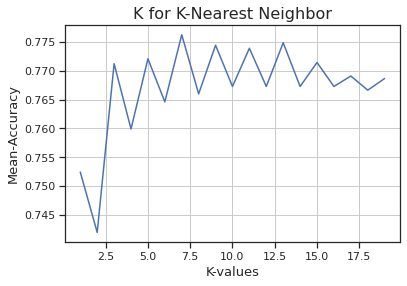

K-Nearest Neighbors: 
Confusion Matrix : 
[[1673  336]
 [ 596 1408]]
Training time= 0.029905 s
Prediction_time= 0.20262 s
Accuracy = 0.7677547969100423
Precision = 0.8073394495412844
Sensitivity = 0.7025948103792415
Specificity = 0.8327526132404182
F score = 0.7513340448239062
Tuning parameter = 7
-------------------------------------------------------------------------------------


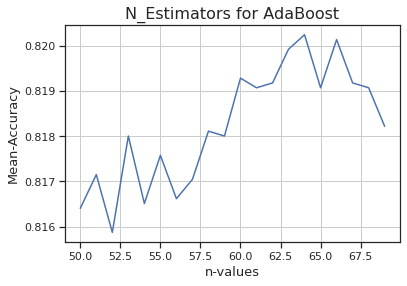

AdaBoost: 
Confusion Matrix : 
[[1619  390]
 [ 344 1660]]
Training time= 1.754413 s
Prediction_time= 0.058491 s
Accuracy = 0.8170944430600549
Precision = 0.8097560975609757
Sensitivity = 0.8283433133732535
Specificity = 0.805873568939771
F score = 0.8189442525900346
Tuning parameter = 64
-------------------------------------------------------------------------------------


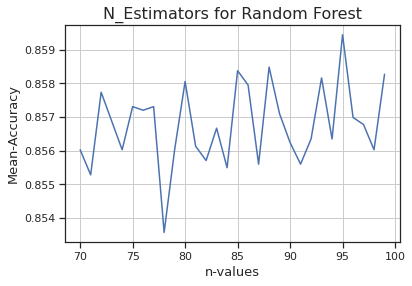

Random Forests: 
Confusion Matrix : 
[[1767  242]
 [ 329 1675]]
Training time= 3.059353 s
Prediction_time= 0.094921 s
Accuracy = 0.8577124345875903
Precision = 0.8737610850286907
Sensitivity = 0.8358283433133733
Specificity = 0.8795420607267297
F score = 0.854373884213211
Tuning parameter = 95
-------------------------------------------------------------------------------------
Decision Tree:
Decision Tree Model accuracy score with criterion gini index: 0.7670
Training-set accuracy score: 0.7792
Training set score: 0.7792
Test set score: 0.7670
Confusion matrix

 [[1569  440]
 [ 495 1509]]
Decision Tree Model accuracy score with criterion entropy: 0.7663
Training-set accuracy score: 0.7789
Training set score: 0.7789
Test set score: 0.7663
Confusion matrix

 [[1569  440]
 [ 498 1506]]
-------------------------------------------------------


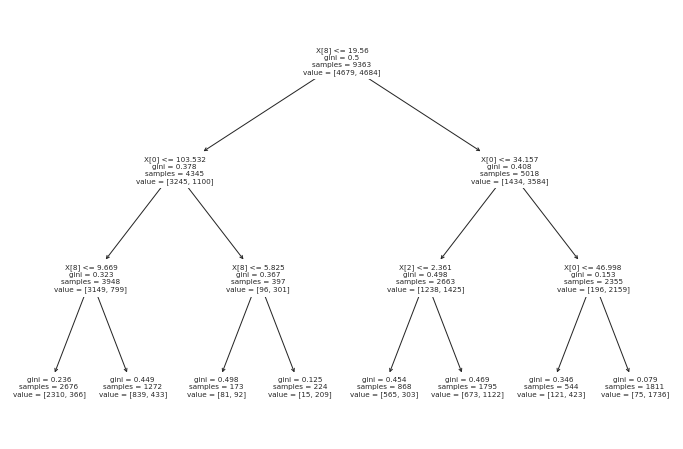

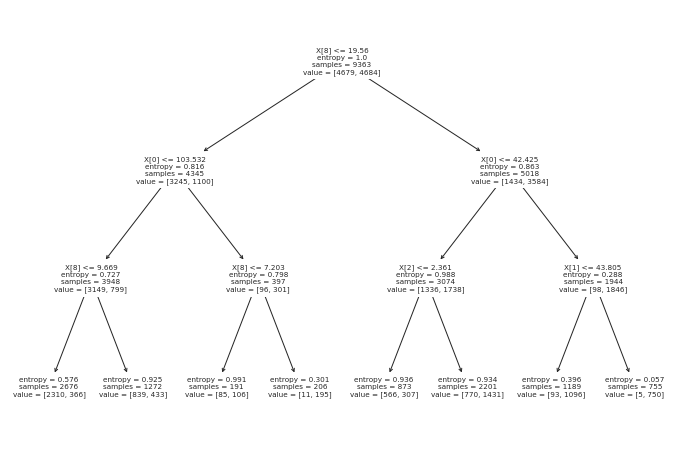

In [14]:
classifications = [naive_bayes,knn,ada_boost,random_forests,decision_tree]
for classification in classifications:
  classification(x_train, x_test, y_train, y_test)